#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [26]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [27]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# 資料準備

In [28]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [29]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [30]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [31]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [33]:

model = Sequential()

In [34]:
#卷積層1

In [35]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [36]:
model.add(Dropout(rate=0.25))

In [37]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [38]:
#卷積層2與池化層2

In [39]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [40]:
model.add(Dropout(0.25))

In [41]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [42]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [43]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [44]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [45]:
model.add(Dense(10, activation='softmax'))

In [46]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [47]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [48]:
import matplotlib.pyplot as plt
def plot_image(train_history,data_name,loss_name):
    plt.plot(train_history[data_name])
    plt.plot(train_history[loss_name])
    plt.title(data)
    plt.xlabel('epoch')
    plt.ylabel(data_name)
    plt.legend([data_name,loss_name])

    plt.show()

In [49]:
print(x_img_train.shape)
print(y_label_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
model.compile(loss = 'MSE', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_img_train[:10000],y_label_train_OneHot[:10000],
                         epochs = 5,validation_split = .2,batch_size = 32,verbose = 1)
'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 7s 863us/step - loss: 0.1799 - accuracy: 0.1007 - val_loss: 0.1807 - val_accuracy: 0.0965
Epoch 2/5
8000/8000 [==============================] - 7s 819us/step - loss: 0.1799 - accuracy: 0.1007 - val_loss: 0.1807 - val_accuracy: 0.0965
Epoch 3/5
8000/8000 [==============================] - 7s 829us/step - loss: 0.1799 - accuracy: 0.1007 - val_loss: 0.1807 - val_accuracy: 0.0965
Epoch 4/5
8000/8000 [==============================] - 7s 829us/step - loss: 0.1799 - accuracy: 0.1007 - val_loss: 0.1807 - val_accuracy: 0.0965
Epoch 5/5
2112/8000 [======>.......................] - ETA: 4s - loss: 0.1793 - accuracy: 0.1037

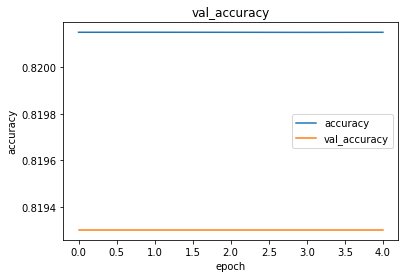

In [56]:
plot_image(train_history.history,'accuracy','val_accuracy')

In [ ]:
print(train_history.history)

In [52]:
import sys
sys.version

'3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]'